In [9]:
%load_ext autoreload

%autoreload 2

from __future__ import print_function, division

import cPickle as pickle
from glob import glob
import subprocess
import sys
import string
import os
import random
import numpy as np
from os.path import join
%matplotlib inline
import matplotlib
matplotlib.rc("figure", dpi=144)
import matplotlib.pyplot as plt


import threebody

p = "../systematics"
if p not in sys.path:
    sys.path.append(p)
import arrow_plot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
def get_fitter(name):
    DIR = join("downhill-runs",name)
    with open(join(DIR, "fitter_params.pickle"),"rb") as f:
        params = pickle.load(f)
    return threebody.Fitter(**params)
    
def get_residuals(name):
    return get_fitter(name).residuals()

def evaluate(name):
    res = get_residuals(name)
    longest = arrow_plot.arrow_plot(
        F.best_parameters, 
        F.mjds.astype(float), 
        res.astype(float), 
        F.phase_uncerts.astype(float))
    return longest    

0.054190165273932833

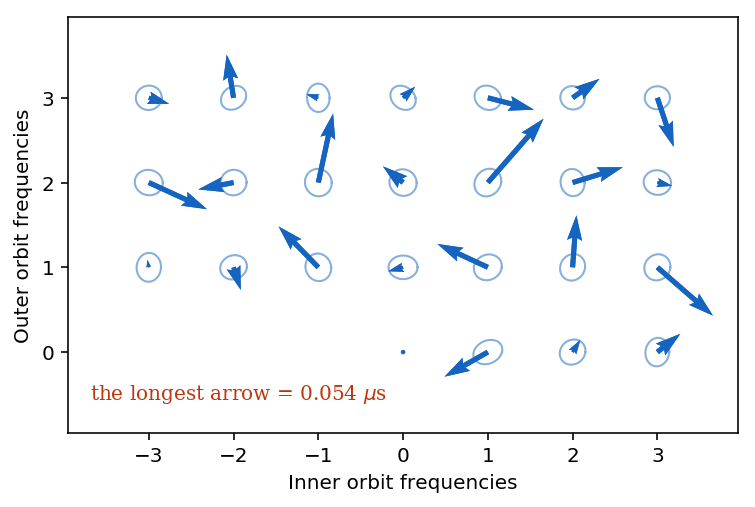

In [25]:
evaluate("primary")

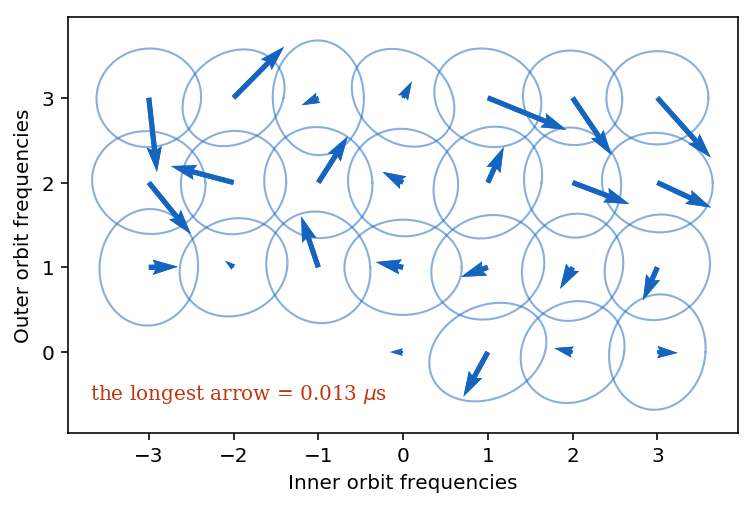

In [26]:
evaluate("dailyDM")
plt.savefig("dailyDM-arrows.pdf")

0.013196342090700544

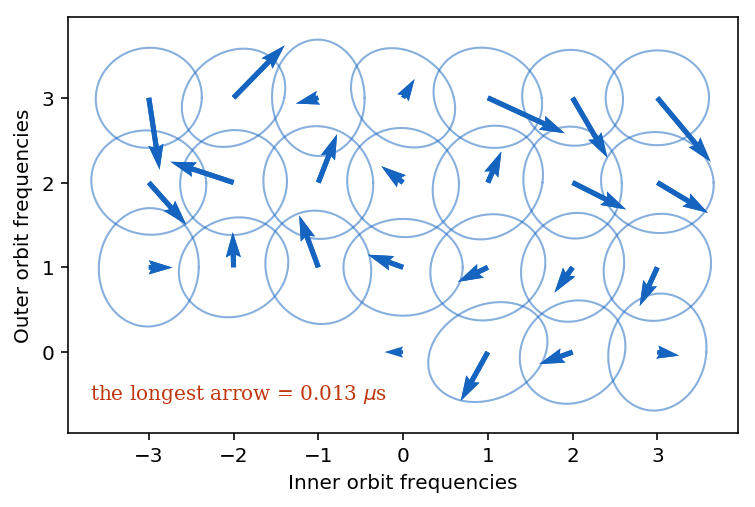

In [28]:
evaluate("GRdaily")

0.33974733193738699

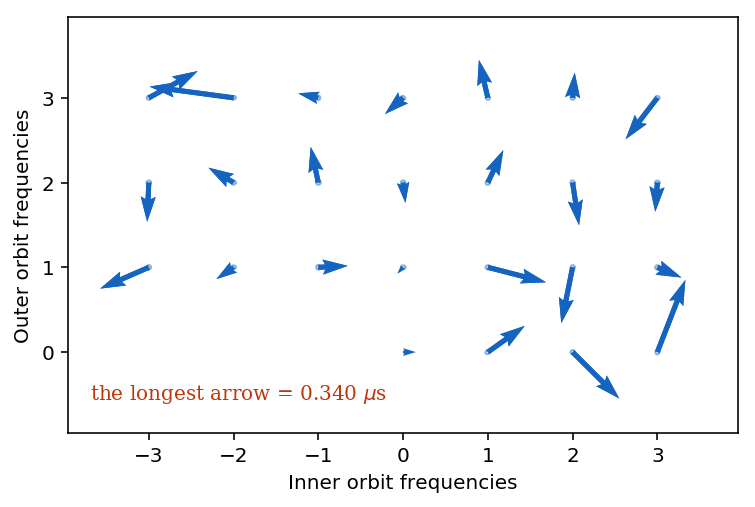

In [29]:
evaluate("newton")

In [65]:
evaluate("lowfreq")

ValueError: operands could not be broadcast together with shapes (27193,) (27110,) 

## What's up with the daily DM fits?

In [32]:
r_delta = get_residuals("dailyDM")
r_gr = get_residuals("GRdaily")

In [34]:
import arrow_plot_fun
import plotter_fun

In [56]:
F = get_fitter("dailyDM")

to_ns = 1e9/F.reference_f0
Rd = plotter_fun.plotter(F.best_parameters, 4, 
                         F.mjds.astype(float), 
                         to_ns*r_delta.astype(float), 
                         to_ns*F.phase_uncerts.astype(float))
Rg = plotter_fun.plotter(F.best_parameters, 4, 
                         F.mjds.astype(float), 
                         to_ns*r_gr.astype(float), 
                         to_ns*F.phase_uncerts.astype(float))

Rm = plotter_fun.plotter(F.best_parameters, 4, 
                         F.mjds.astype(float), 
                         to_ns*r_gr.astype(float), 
                         to_ns*F.phase_uncerts.astype(float))
Rm.U -= Rd.U
Rm.V -= Rd.V


13.334818589267647

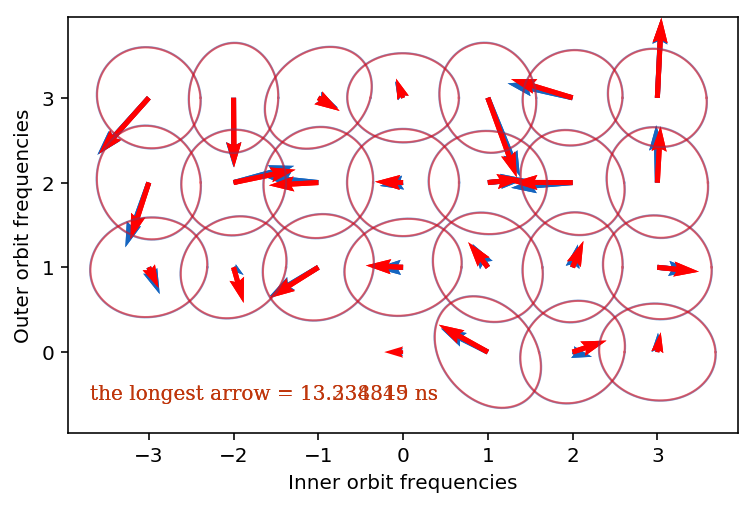

In [63]:
arrow_plot_fun.coeff_plot(Rd, units="ns")
arrow_plot_fun.coeff_plot(Rg, units="ns", color="red")


4.4207491312897993

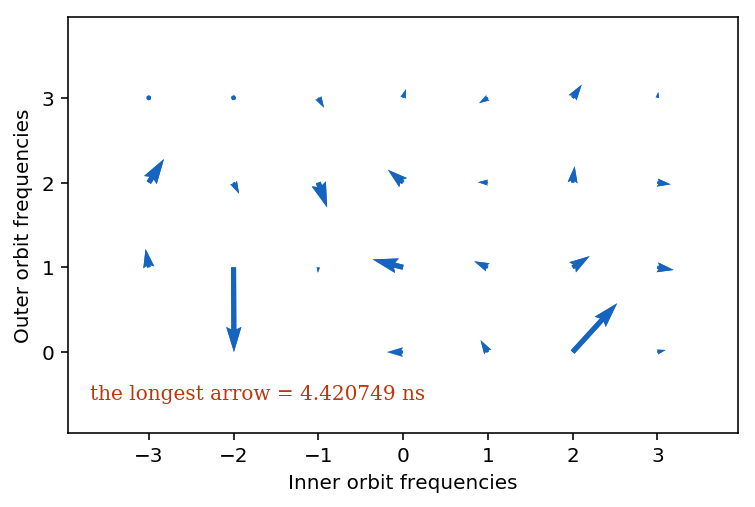

In [64]:
arrow_plot_fun.coeff_plot(Rm, plot_unc=False, units="ns")
#arrow_plot_fun.coeff_plot(Rg)


4.8446170579306246e-06

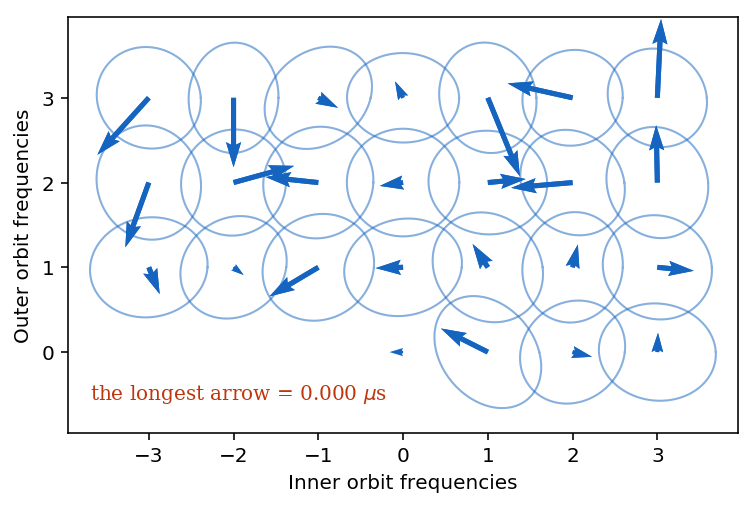

In [55]:
arrow_plot_fun.coeff_plot(Rd)